<a href="https://colab.research.google.com/github/omerfalach/Death-Classification-FAERS/blob/main/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
##connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
##Installations for google colab
!pip install category_encoders
!pip install --upgrade plotly
!pip install squarify

In [7]:
import sys
import numpy as np
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
import pandas as pd
import pytz
import pickle
import dill as dillpickle
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_transformer
from sklearn.base import BaseEstimator, TransformerMixin
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
import os
import warnings
import random
from sklearn.preprocessing import StandardScaler
import requests
from category_encoders import TargetEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, roc_auc_score, recall_score, accuracy_score, make_scorer
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, roc_curve, auc,precision_recall_curve,ConfusionMatrixDisplay
import plotly.express as px
from sklearn.model_selection import StratifiedKFold
from scipy import stats
from datetime import datetime as dt
import gc
###Import project_plots.py
py_file_location = "/content/drive/MyDrive/Colab Notebooks/Project/scripts"
sys.path.append(os.path.abspath(py_file_location))
import project_plots as op

# Loading Data

In [8]:
##Loading Data
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset.csv")

In [ ]:
# # naive_drugs = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/all_drugs_naive_first_rolecod.csv")
# # drug_list = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/all_drugs_tf_idf_listed.csv")
# indi_list = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/indications_listed.csv")
# # drug_list = drug_list.dropna(subset = ['drugname_clean'])
# # indi_list = indi_list.dropna(subset = ['indi_pt'])
# # naive_drugs = naive_drugs.drop(columns = ['drugname','dechal','rechal','drug_seq'])
# # drug_list = drug_list.drop(columns = ['Unnamed: 0']).rename(columns= {'drugname_clean':'drugname_listed','role_cod':'role_cod_listed'})
# naive = pd.merge(demo_outc,naive_drugs,how='left',on = ['primaryid'	,'caseid'])
# data = pd.merge(naive,drug_list,how='left',on = ['primaryid'	,'caseid'])
# data = pd.merge(data,indi_list,how='left',on = ['primaryid'	,'caseid'])

In [9]:
data.head(10)

,primaryid,caseid,outc_cod,sex,age,age_cod,age_grp,wt,wt_cod,occr_country,init_fda_dt,fda_dt,event_dt,filename,drugname,role_cod,dechal,rechal,drug_seq,drugname_listed,role_cod_listed,indi_pt,#drugs_to_indi
0,35032933,3503293,HO,F,39.0,YR,NaN,83.0,KG,US,20000720,20150129,20000118.0,DEMO15Q1,AVONEX,PS,NaN,D,1.0,"['AVONEX', 'AVONEX', 'ZOLOFT', 'LIPITOR', 'SYN...","['PS', 'SS', 'C', 'C', 'C', 'C', 'C']","['Benign neoplasm of thyroid gland', 'Depressi...","[1, 3, 1, 2]"
1,36655882,3665588,HO,F,35.0,YR,NaN,NaN,NaN,DE,20010611,20150106,NaN,DEMO15Q1,LEPONEX CLOZARIL CLOZAPINE,PS,NaN,D,1.0,"['LEPONEX CLOZARIL CLOZAPINE', 'CARBAMAZEPINE...","['PS', 'SS', 'SS']",['Schizoaffective disorder'],[3]
2,38671183,3867118,HO,F,54.0,YR,NaN,70.0,KG,US,20021107,20150119,20021015.0,DEMO15Q1,AVONEX,PS,NaN,D,1.0,"['AVONEX', 'ACETAMINOPHEN']","['PS', 'C']","['Influenza like illness', 'Multiple sclerosis']","[1, 1]"
3,38775713,3877571,LT,M,NaN,NaN,NaN,NaN,NaN,GB,20021210,20150226,NaN,DEMO15Q1,CLOZARIL,PS,NaN,D,1.0,['CLOZARIL'],['PS'],['Schizophrenia'],[1]
4,40954634,4095463,DE,F,65.0,YR,NaN,NaN,NaN,JP,20040226,20150123,20040204.0,DEMO15Q1,GLIVEC,PS,NaN,U,1.0,"['GLIVEC', 'GLIVEC', 'CYLOCIDE', 'LASIX', 'FOY']","['PS', 'SS', 'SS', 'C', 'C']","['Acute kidney injury', 'Blast cell crisis', '...","[1, 1, 1, 1, 1]"
5,41149942,4114994,HO,F,17.0,YR,A,NaN,NaN,NaN,20040319,20150218,200011.0,DEMO15Q1,TACROLIMUS,PS,D,D,1.0,"['TACROLIMUS', 'AZATHIOPRINE', 'UNSPECIFIED IN...","['PS', 'C', 'C', 'C', 'C', 'C', 'C']",['Liver transplant'],[1]
6,41352566,4135256,HO,F,46.0,YR,NaN,NaN,NaN,US,20040426,20150227,200303.0,DEMO15Q1,AVONEX,PS,NaN,D,1.0,"['AVONEX', 'AVONEX', 'RITALIN', 'WELLBUTRIN', ...","['PS', 'SS', 'C', 'C', 'C', 'C', 'C', 'C', 'C']","['Contraception', 'Hypothyroidism', 'Multiple ...","[1, 1, 5]"
7,41943882,4194388,HO,F,75.0,YR,NaN,60.8,KG,NaN,20040712,20150226,20040321.0,DEMO15Q1,PREVACID,PS,Y,D,1.0,"['PREVACID', 'SYNTHROID', 'FOSAMAX']","['PS', 'C', 'C']",['Gastrooesophageal reflux disease'],[1]
8,42207644,4220764,OT,F,18.0,YR,A,NaN,NaN,US,20040901,20150310,200404.0,DEMO15Q1,ENBREL,PS,NaN,D,1.0,['ENBREL'],['PS'],['Psoriasis'],[1]
9,57166203,5716620,HO,M,54.0,YR,NaN,NaN,NaN,US,20050107,20150225,20041130.0,DEMO15Q1,AVONEX,PS,NaN,D,1.0,"['AVONEX', 'AVONEX']","['PS', 'SS']",['Multiple sclerosis'],[3]


In [ ]:
##External resources
health_score = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Compliance with the International Health Regulations BY COUNTRY.csv")

In [10]:
data.columns

Index(['primaryid', 'caseid', 'outc_cod', 'sex', 'age', 'age_cod', 'age_grp',
       'wt', 'wt_cod', 'occr_country', 'init_fda_dt', 'fda_dt', 'event_dt',
       'filename', 'drugname', 'role_cod', 'dechal', 'rechal', 'drug_seq',
       'drugname_listed', 'role_cod_listed', 'indi_pt', '#drugs_to_indi'],
      dtype='object')

In [ ]:
#Dropping colmns
data = data.drop(columns = ['init_fda_dt','fda_dt', 'event_dt','dechal', 'rechal', 'drug_seq'])

In [11]:
infor =op.info_new(data,ignore_features= ['primaryid','caseid','drugname_listed','role_cod_listed','indi_pt','#drugs_to_indi'])
infor

Object types:
Ctype   float64  int64  object
Column        4      2      11
X is composed of 6046950 samples and 23 features.


,colName,Non-null values,Nunique,Dtype,Unique
0,outc_cod,6046950,7,object,"[HO, LT, DE, OT, CA, DS, RI]"
1,sex,5241248,6,object,"[F, M, nan, UNK, P, T, I]"
2,age,3846136,14284,float64,"[39.0, 35.0, 54.0, nan, 65.0, 17.0, 46.0, 75.0..."
3,age_cod,3846507,6,object,"[YR, nan, DY, MON, DEC, WK, HR]"
4,age_grp,1094883,6,object,"[nan, A, C, N, T, E, I]"
5,wt,1381732,10259,float64,"[83.0, nan, 70.0, 60.8, 56.7, 90.7, 72.0, 42.0..."
6,wt_cod,1381706,2,object,"[KG, nan, LBS]"
7,occr_country,5975250,235,object,"[US, DE, GB, JP, nan, IT, NO, FR, BE, ES, CA, ..."
8,init_fda_dt,6046950,5490,int64,"[20000720, 20010611, 20021107, 20021210, 20040..."
9,fda_dt,6046950,4127,int64,"[20150129, 20150106, 20150119, 20150226, 20150..."


In [12]:
#normlaize age column to Years
def fixed_age(df,age,age_code):
    df.loc[(df[age]<=12) & df[age_code] == "DEC", age] = df[age]*10
    df.loc[df[age_code] == "MON", age] = df[age]/12
#     
    df.loc[df[age_code] == "MON", age] = df[age]/12
    df.loc[df[age_code]== "DY", age] = df[age]/365
    df.loc[df[age_code] == "WK", age] = df[age]/52
    df.loc[df[age_code] == "HR", age] = df[age]/8765.8127
    return df    
#normlaize wt column to kilograms
def fixed_weight(df,wt,wt_cod): 
        # unified weight unit
        df[wt] = df[wt].apply(pd.to_numeric, errors='coerce')
        df.loc[df[wt_cod] == "LBS", wt] = df[wt]  * 0.453592 # pounds
        df.loc[df[wt_cod]== "GMS", wt] = df[wt]* 0.001# grams
        return df
def fixed_label(df,label):
  df[label] = df[label].apply(lambda x: 1 if x=='DE' else 0)
  return df
def convert_str_to_list(x):
    try:
        z= x.strip('[]').replace("'", "").split(',')
        z1 = [f.strip() for f in z]
        return  z1
    except:
        return x # replace with any suitable placeholder value
data['indi_pt']= data['indi_pt'].apply(lambda x: convert_str_to_list(x) if type(x)!=float else x)
data['drugname_listed']= data['drugname_listed'].apply(lambda x: convert_str_to_list(x) if type(x)!=float else x)
data['role_cod_listed']= data['role_cod_listed'].apply(lambda x: convert_str_to_list(x) if type(x)!=float else x)
data_fixed = fixed_age(data,'age','age_cod')
data_fixed = fixed_weight(data_fixed,'wt', 'wt_cod')
data_fixed = fixed_label(data_fixed,'outc_cod')


In [13]:
#count_indications_and_drugs_per_case
data_fixed['#drug_background'] = data_fixed['drugname_listed'].apply(lambda x: len(x) if type(x)!=float else x)
data_fixed['#indication_background'] = data_fixed['indi_pt'].apply(lambda x: len(x) if type(x)!=float else x)

# Outliers

In [19]:
small_categorical = ['sex']
large_categorical = ['occr_country']
continuous = ['age','wt']
backgrounds = ['#drug_background','#indication_background'] 

### Outliers - Continuous Featuers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb771651210>,
      dtype=object)

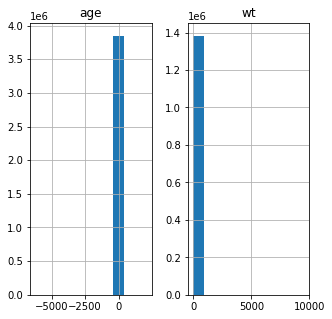

In [17]:
data_fixed[continuous].hist(figsize=(5,5),bins = 10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb7758c1590>,
      dtype=object)

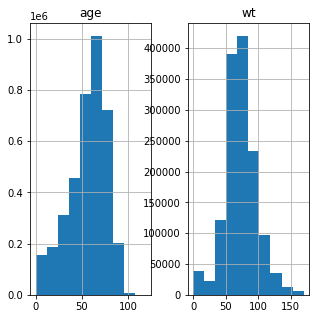

In [18]:
##Convert outliers to np.nan
data_fixed.loc[(data_fixed['age']>=120) | (data_fixed['age']<=0) , 'age'] = np.nan
data_fixed.loc[(data_fixed['wt']>170), 'wt'] =  np.nan
data_fixed[continuous].hist(figsize=(5,5))



```
# This is formatted as code
```

### Outliers - Categorical Featuers

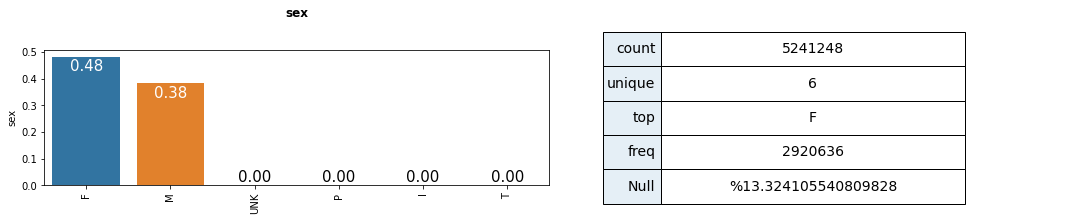

In [20]:
##small categorical
op.plot_dist(data_fixed,small_categorical)

In [21]:
#sex feature - dropping outliers
sex_outliers = ['UNK','P','I','T']
data_fixed =  data_fixed[~data_fixed['sex'].isin(sex_outliers)]

/content/drive/MyDrive/Colab Notebooks/Project/scripts/project_plots.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D[category] = D[category].astype('object')
/content/drive/MyDrive/Colab Notebooks/Project/scripts/project_plots.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D[category] = D[category].astype('object')


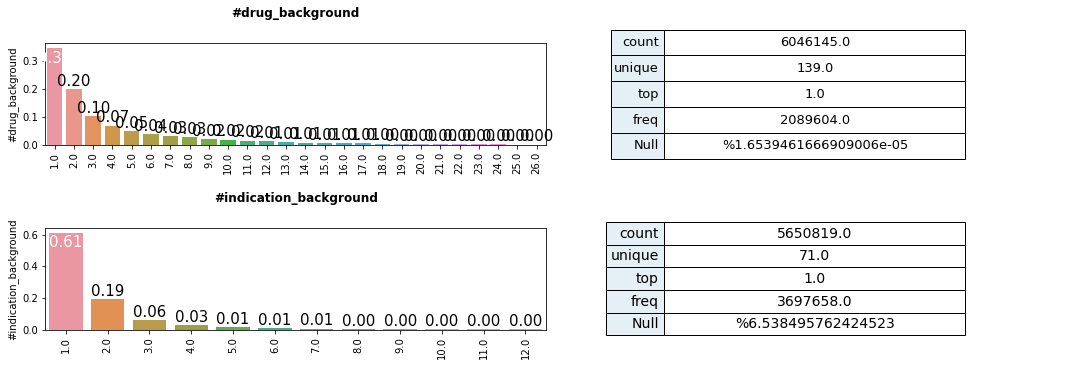

In [22]:
op.plot_dist(data_fixed,['#drug_background','#indication_background'],limit = 0.001)

In [ ]:
# ##Large categorical
# op.plot_large_cate(naive_fixed,['occr_country'])

# Correlation

In [ ]:
### Correlation - continuous featuers

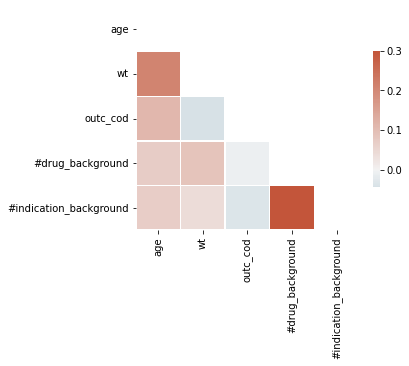

In [23]:
op.corr_plot(data[["age","wt","outc_cod","#drug_background","#indication_background"]])

In [24]:
### Correlation - categorical featuers

### Cat
Cramer's V correlation
In statistics, Cramér's V is a measure of association between two nominal variables, giving a value between 0 and +1 (inclusive). It is based on Pearson's chi-squared statistic and was published by Harald Cramér in 1946. [ref. ]

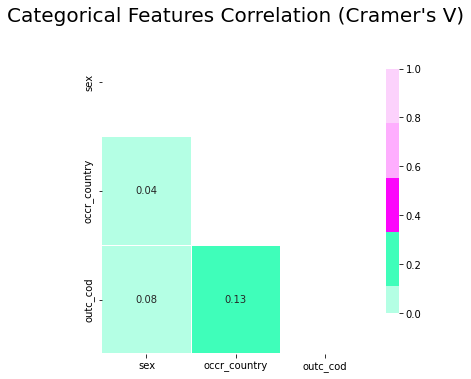

In [25]:
op.plot_carmer_v_corr(data[["sex","occr_country","outc_cod"]])

# Correlation to Label

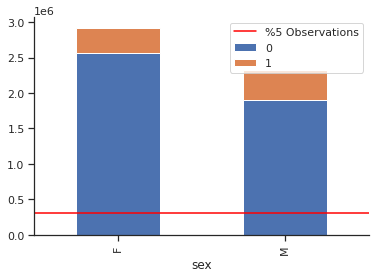

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


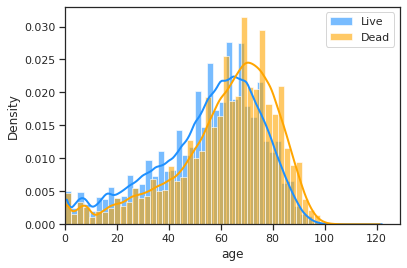

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


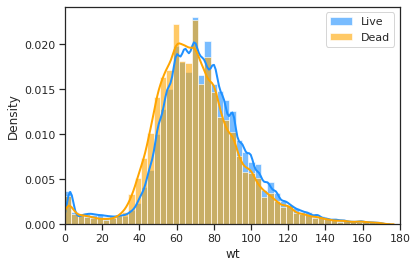

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


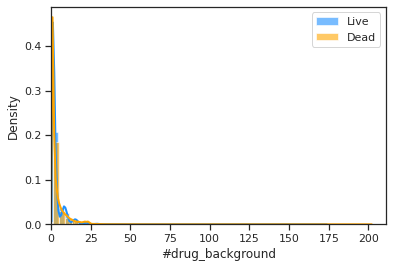

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


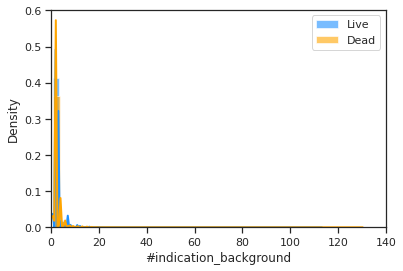

In [ ]:
# Small_CATEGORICAL_FEATURES = ['sex','#drug_background','#indication_background']
Small_CATEGORICAL_FEATURES = ['sex']

ignore_list = ['primaryid','caseid','outc_cod','occr_country','role_cod_listed','#drugs_to_indi','drugname','drugname_listed','indi_pt','wt_cod','role_cod','age_grp','age_cod','#drug_background','#indication_background']
for col in data_fixed.columns:
    if col in ignore_list:
        continue
    elif col in Small_CATEGORICAL_FEATURES:
        op.plot_label_corr_bar(data_fixed, col)
    else:
        op.plot_label_corr_hist(data_fixed, col)

In [26]:
op.treemap(data_fixed,'drugname','outc_cod')

In [27]:
op.treemap(data_fixed,'occr_country','outc_cod')


# Missing Values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



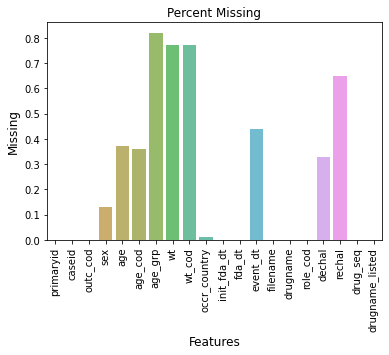

In [33]:
op.plot_missing_values(data_fixed)

# Data Balance

/content/drive/MyDrive/Colab Notebooks/Project/scripts/project_plots.py:99: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



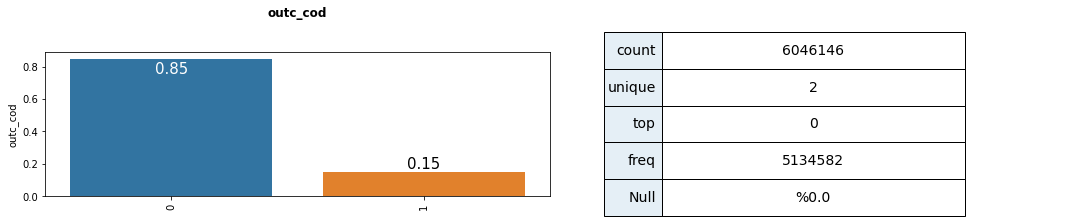

In [34]:
op.plot_dist(data_fixed,['outc_cod'])

# Split Train-Test

In [ ]:
data_fixed= data_fixed.dropna(subset=['outc_cod', 'occr_country'])
naivefstra = data_fixed.drop(columns = ['primaryid','caseid','wt_cod','role_cod','age_grp','age_cod','wt','#drugs_to_indi'])
del naive_fixed
gc.collect()


In [ ]:
naivefstra['outc_cod'] = naivefstra['outc_cod'].astype(int)
def get_stratified_split(x,y,test_size = 0.2):
    n_folds = int(round(1/test_size))
    skf = StratifiedKFold(n_splits = n_folds, random_state = 0, shuffle = True)
    for tr_ind, test_ind in skf.split(x,y):
        break
    return tr_ind,test_ind

tr_ind, test_ind = get_stratified_split(np.zeros(len(naivefstra)),naivefstra['outc_cod'],test_size =0.2)
features = list(naivefstra.columns)
features.remove('outc_cod')
train_features = naivefstra[features].iloc[tr_ind]
test_features = naivefstra[features].iloc[test_ind]
train_labels = naivefstra['outc_cod'].iloc[tr_ind]
test_labels = naivefstra['outc_cod'].iloc[test_ind]

In [ ]:
##Save splitted_files
train_features.to_csv('/content/drive/MyDrive/Colab Notebooks/Project/train_test_files/train_features.csv',index = False)
test_features.to_csv('/content/drive/MyDrive/Colab Notebooks/Project/train_test_files/test_features.csv',index = False)
train_labels.to_csv('/content/drive/MyDrive/Colab Notebooks/Project/train_test_files/train_labels.csv',index = False)
test_labels.to_csv('/content/drive/MyDrive/Colab Notebooks/Project/train_test_files/test_labels.csv',index = False)

In [ ]:
# train_features= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_features1.csv')
# test_features= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_features1.csv')
# train_labels= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_labels1.csv')
# test_labels= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_labels1.csv')